torchvision:  0.17.2
CUDA available: True
tif type: <class 'tifffile.tifffile.TiffFile'>
image type: <class 'numpy.ndarray'>
shape of image: (48740, 75250, 3)
the shape of the image is represented as a: <class 'tuple'>
the first entry in image is: [238 240 239]

0: 320x448 300 1s, 185.6ms
Speed: 9.9ms preprocess, 185.6ms inference, 365.0ms postprocess per image at shape (1, 3, 320, 448)


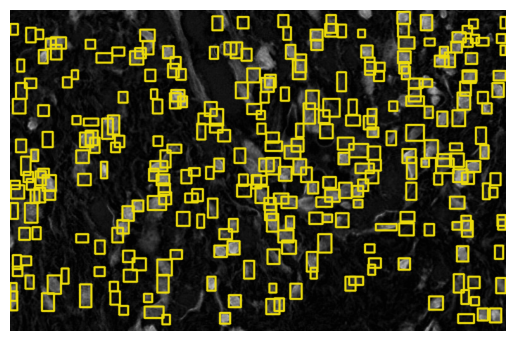

In [1]:
import tifffile
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import torch, torchvision
from scipy.spatial import Voronoi, voronoi_plot_2d
print("torchvision: ", torchvision.__version__)
print('CUDA available:', torch.cuda.is_available())

base_path = r"R:\FIVE\EXP\FIV925\Additional Datasets"
dataset = "Human Colon Cancer"
ome_tiff_path = f"{base_path}\\{dataset}\\Visium_HD_Human_Colon_Cancer_tissue_image.btf"
scale_factor = 1
tif = tifffile.TiffFile(ome_tiff_path)
image = tif.asarray()

image_dims = image.shape
print("tif type:", type(tif))
print("image type:", type(image))
print("shape of image:", image_dims)
print("the shape of the image is represented as a:", type(image_dims))
print("the first entry in image is:", image[0][0])

height, width = image.shape[:2]
mid_y = height // 2
mid_x = width // 2
top_left_quadrant = image[:mid_y,:mid_x,0]
tile_height = (height // 96)
tile_width = (width // 96)
somewhere_in_the_middle = image[mid_y:mid_y+tile_height,mid_x:mid_x+tile_width,0]
inverted = 1 - somewhere_in_the_middle
plt.imshow(inverted, cmap='gray')
plt.axis('off')  # to hide axis labels and ticks 

# first, what does predicting on this image even look like?
yolo_model_path = r"S:\Phys\FIV925 XSection\Datasets\Brain\01c\YO 432 0515 Yeti\map75=0669758 yolov9c .pt idx=4 ep=8 btch=8 rnd=4229985\weights\best.pt"
arr_as_img = Image.fromarray(inverted, 'L')
model = YOLO(yolo_model_path)
prediction = model.predict(arr_as_img, conf=0.5)
im_array = prediction[0].plot(labels=False)

plt.imshow(im_array)
plt.axis('off')
plt.show()

# im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
# im.show()  # show image

# ChatGPT code

torchvision:  0.17.2
CUDA available: True
tif type: <class 'tifffile.tifffile.TiffFile'>
image type: <class 'numpy.ndarray'>
shape of image: (48740, 75250, 3)
the shape of the image is represented as a: <class 'tuple'>
the first entry in image is: [238 240 239]

0: 320x448 300 1s, 207.6ms
Speed: 5.0ms preprocess, 207.6ms inference, 347.4ms postprocess per image at shape (1, 3, 320, 448)


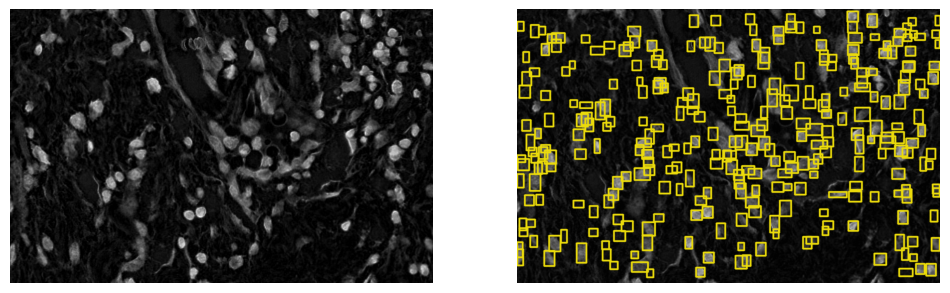

In [1]:
import tifffile
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import torch, torchvision
from scipy.spatial import Voronoi, voronoi_plot_2d

print("torchvision: ", torchvision.__version__)
print('CUDA available:', torch.cuda.is_available())

base_path = r"R:\FIVE\EXP\FIV925\Additional Datasets"
dataset = "Human Colon Cancer"
ome_tiff_path = f"{base_path}\\{dataset}\\Visium_HD_Human_Colon_Cancer_tissue_image.btf"
scale_factor = 1
tif = tifffile.TiffFile(ome_tiff_path)
image = tif.asarray()

image_dims = image.shape
print("tif type:", type(tif))
print("image type:", type(image))
print("shape of image:", image_dims)
print("the shape of the image is represented as a:", type(image_dims))
print("the first entry in image is:", image[0][0])

height, width = image.shape[:2]
mid_y = height // 2
mid_x = width // 2
top_left_quadrant = image[:mid_y, :mid_x, 0]
tile_height = height // 96
tile_width = width // 96
somewhere_in_the_middle = image[mid_y:mid_y + tile_height, mid_x:mid_x + tile_width, 0]
inverted = 1 - somewhere_in_the_middle

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image
axs[0].imshow(inverted, cmap='gray')
axs[0].axis('off')  # to hide axis labels and ticks

# first, what does predicting on this image even look like?
yolo_model_path = r"S:\Phys\FIV925 XSection\Datasets\Brain\01c\YO 432 0515 Yeti\map75=0669758 yolov9c .pt idx=4 ep=8 btch=8 rnd=4229985\weights\best.pt"
arr_as_img = Image.fromarray(inverted, 'L')
model = YOLO(yolo_model_path)
prediction = model.predict(arr_as_img, conf=0.5)
im_array = prediction[0].plot(labels=False)

# Display the second image
axs[1].imshow(im_array)
axs[1].axis('off')

# Show the figure
plt.show()


# ChatGPT Code voronoi boundaries (whole image)

torchvision:  0.17.2
CUDA available: True

0: 448x448 (no detections), 24.5ms
Speed: 7.0ms preprocess, 24.5ms inference, 18.0ms postprocess per image at shape (1, 3, 448, 448)

0: 448x448 (no detections), 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 448)

0: 448x448 (no detections), 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 448)

0: 448x448 (no detections), 29.0ms
Speed: 1.5ms preprocess, 29.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 448)

0: 448x448 (no detections), 21.0ms
Speed: 3.0ms preprocess, 21.0ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 448)

0: 448x448 (no detections), 22.0ms
Speed: 1.0ms preprocess, 22.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 448)

0: 448x448 (no detections), 20.5ms
Speed: 1.0ms preprocess, 20.5ms inference, 0.0ms postprocess per image at shape (1, 3, 448, 448)

0: 448x448 (no detections

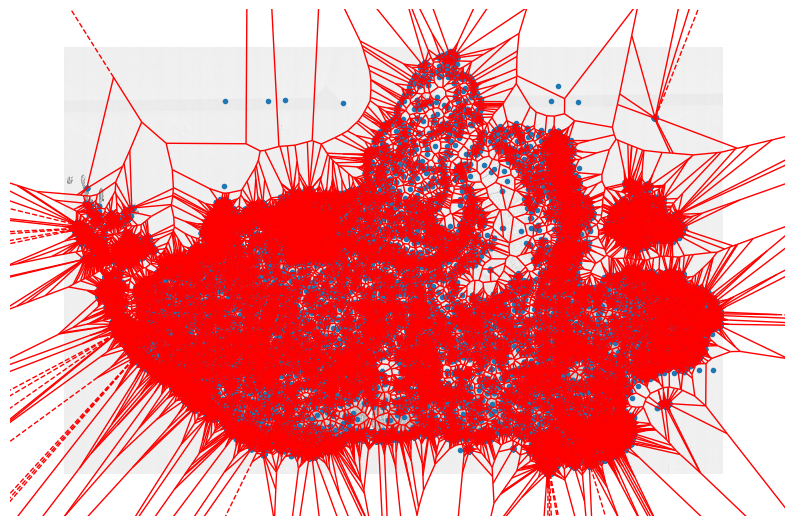

In [1]:
import tifffile
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import torch, torchvision
from scipy.spatial import Voronoi, voronoi_plot_2d

print("torchvision: ", torchvision.__version__)
print('CUDA available:', torch.cuda.is_available())

base_path = r"R:\FIVE\EXP\FIV925\Additional Datasets"

dataset = "Human Colon Cancer"
ome_tiff_path = f"{base_path}\\{dataset}\\Visium_HD_Human_Colon_Cancer_tissue_image.btf"

scale_factor = 1

tif = tifffile.TiffFile(ome_tiff_path)

image = tif.asarray()
tile_size = 384
image_height, image_width = image.shape[:2]
yolo_model_path = r"S:\Phys\FIV925 XSection\Datasets\Brain\01c\YO 432 0515 Yeti\map75=0669758 yolov9c .pt idx=4 ep=8 btch=8 rnd=4229985\weights\best.pt"
model = YOLO(yolo_model_path)
df = pd.DataFrame()
image_single_channel = image[:,:,0]

list_of_centers = []

# for each tile in the image ...
# I wanna predict on the tile, and also draw voronoi boxes over it?
#   Ohh, so I need to predict on the image to find the centers of the cells, then use voronoi to draw the boundaries over the cells
tile_height = tile_size
tile_width = tile_size

for i in range(0, image_height, tile_height): # section_miny, section_maxy
    for j in range(0, image_width, tile_width): # section_minx, section_maxx
        tile = image_single_channel[i:i+tile_height, j:j+tile_width]
        if tile.shape[0] == 0 or tile.shape[1] == 0:
            continue  # Skip tiles that have no width or height
        
        tile_as_img = Image.fromarray(tile, 'L')
        predictions = model.predict(tile_as_img, show=False, max_det=3000)
        
        result = predictions[0]
        
        # ok, so I can just make a list of the centers of the predictions and have the voronoi algorithm make the segmentations
        boxes_tensor = result.boxes.xywh
        boxes_array = boxes_tensor.cpu().numpy()
        centers = boxes_array[:, :2]
        
        # need to flip i and j here because the list of boxes are of form xy instead of row,col
        to_add = np.array([j,i])
        
        centers_scaled = centers + to_add
        
        if centers.size != 0:
            list_of_centers.append(centers_scaled)

# Flatten the list of centers
all_centers = np.vstack(list_of_centers)

# Create a Voronoi diagram from the centers
vor = Voronoi(all_centers)

# Plot the image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_single_channel, cmap='gray')
ax.axis('off')

# Plot Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='red', line_width=1)

plt.show()
